In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

In [2]:
train_data = pd.read_csv('./datasets/training/training.csv')
test_data = pd.read_csv('./datasets/test/test.csv')
idLUT = pd.read_csv('./datasets/IdLookupTable.csv')

print(train_data.shape)
print(test_data.shape)
print(idLUT.shape)

(7049, 31)
(1783, 2)
(27124, 4)


In [3]:
train_data

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,67.402546,31.842551,29.746749,38.632942,NaN,NaN,NaN,NaN,NaN,NaN,...,67.029093,NaN,NaN,NaN,NaN,NaN,NaN,50.426637,79.683921,71 74 85 105 116 128 139 150 170 187 201 209 2...
7045,66.134400,38.365501,30.478626,39.950198,NaN,NaN,NaN,NaN,NaN,NaN,...,66.626011,NaN,NaN,NaN,NaN,NaN,NaN,50.287397,77.983023,60 60 62 57 55 51 49 48 50 53 56 56 106 89 77 ...
7046,66.690732,36.845221,31.666420,39.685042,NaN,NaN,NaN,NaN,NaN,NaN,...,67.515161,NaN,NaN,NaN,NaN,NaN,NaN,49.462572,78.117120,74 74 74 78 79 79 79 81 77 78 80 73 72 81 77 1...
7047,70.965082,39.853666,30.543285,40.772339,NaN,NaN,NaN,NaN,NaN,NaN,...,66.724988,NaN,NaN,NaN,NaN,NaN,NaN,50.065186,79.586447,254 254 254 254 254 238 193 145 121 118 119 10...


In [4]:
test_data

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...
...,...,...
1778,1779,101 101 101 100 100 97 97 98 102 149 214 206 1...
1779,1780,201 191 171 158 145 140 136 130 123 115 108 10...
1780,1781,28 28 29 30 31 32 33 34 39 44 46 46 49 54 61 7...
1781,1782,104 95 71 57 46 52 65 70 70 67 76 72 69 69 72 ...


In [5]:
idLUT

,RowId,ImageId,FeatureName,Location
0,1,1,left_eye_center_x,NaN
1,2,1,left_eye_center_y,NaN
2,3,1,right_eye_center_x,NaN
3,4,1,right_eye_center_y,NaN
4,5,1,left_eye_inner_corner_x,NaN
...,...,...,...,...
27119,27120,1783,right_eye_center_y,NaN
27120,27121,1783,nose_tip_x,NaN
27121,27122,1783,nose_tip_y,NaN
27122,27123,1783,mouth_center_bottom_lip_x,NaN


In [6]:
train_images = train_data['Image']

In [7]:
train_images

0       238 236 237 238 240 240 239 241 241 243 240 23...
1       219 215 204 196 204 211 212 200 180 168 178 19...
2       144 142 159 180 188 188 184 180 167 132 84 59 ...
3       193 192 193 194 194 194 193 192 168 111 50 12 ...
4       147 148 160 196 215 214 216 217 219 220 206 18...
                              ...                        
7044    71 74 85 105 116 128 139 150 170 187 201 209 2...
7045    60 60 62 57 55 51 49 48 50 53 56 56 106 89 77 ...
7046    74 74 74 78 79 79 79 81 77 78 80 73 72 81 77 1...
7047    254 254 254 254 254 238 193 145 121 118 119 10...
7048    53 62 67 76 86 91 97 105 105 106 107 108 112 1...
Name: Image, Length: 7049, dtype: object

(96, 96)


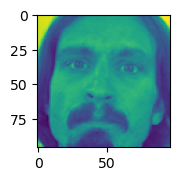

In [8]:
# train_images is an array of strings, which we have to convert to floats for display
image_arr_str = train_images[0].split()
image_arr_float = np.zeros(len(image_arr_str))
for i in range(len(image_arr_str)):
    image_arr_float[i] = float(image_arr_str[i])
image_arr_float = np.reshape(image_arr_float, (96,96))
print(image_arr_float.shape)
plt.figure(figsize=(20, 10))
plt.subplot(5,5,1)
plt.imshow(image_arr_float)

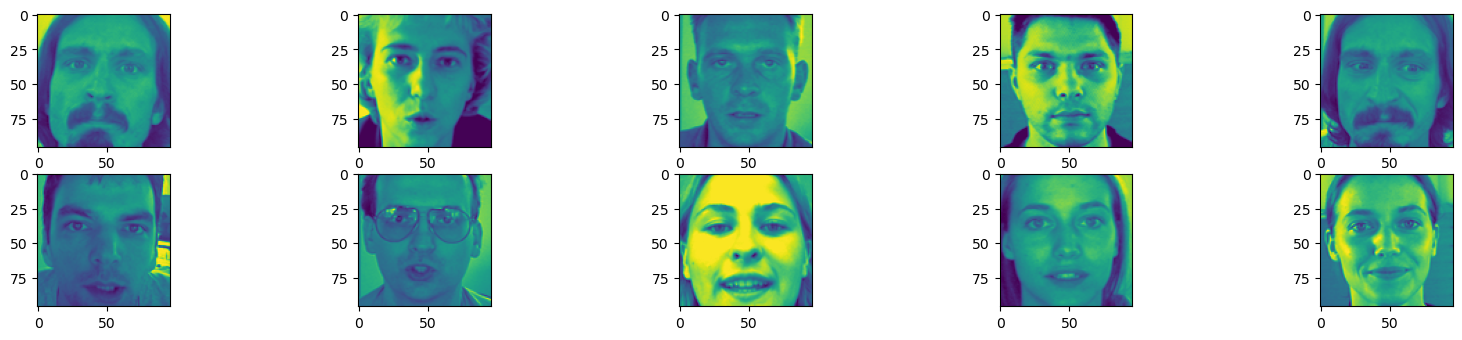

In [9]:
#do the above for the first 10 images

plt.figure(figsize=(20, 10))

for j in range(0, 10):
    image_arr_str = train_images[j].split()
    image_arr_float = np.zeros(len(image_arr_str))
    for i in range(len(image_arr_str)):
        image_arr_float[i] = float(image_arr_str[i])
    image_arr_float = np.reshape(image_arr_float, (96,96))
    
    plt.subplot(5,5,j+1)
    plt.imshow(image_arr_float)

## Missing Value Analysis

In [10]:
train_data.isnull()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,False,False,False,False,True,True,True,True,True,True,...,False,True,True,True,True,True,True,False,False,False
7045,False,False,False,False,True,True,True,True,True,True,...,False,True,True,True,True,True,True,False,False,False
7046,False,False,False,False,True,True,True,True,True,True,...,False,True,True,True,True,True,True,False,False,False
7047,False,False,False,False,True,True,True,True,True,True,...,False,True,True,True,True,True,True,False,False,False


In [11]:
train_data.isnull().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [12]:
train_data.isnull().sum().sum() #total number of missing values

105412

In [13]:
train_data = train_data.fillna(method='ffill') #fill missing values using the last valid value in the same column
train_data

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,67.402546,31.842551,29.746749,38.632942,59.255347,36.065143,73.942694,34.624653,37.478531,39.398041,...,67.029093,72.600433,71.862041,34.232759,77.339429,51.599453,75.963592,50.426637,79.683921,71 74 85 105 116 128 139 150 170 187 201 209 2...
7045,66.134400,38.365501,30.478626,39.950198,59.255347,36.065143,73.942694,34.624653,37.478531,39.398041,...,66.626011,72.600433,71.862041,34.232759,77.339429,51.599453,75.963592,50.287397,77.983023,60 60 62 57 55 51 49 48 50 53 56 56 106 89 77 ...
7046,66.690732,36.845221,31.666420,39.685042,59.255347,36.065143,73.942694,34.624653,37.478531,39.398041,...,67.515161,72.600433,71.862041,34.232759,77.339429,51.599453,75.963592,49.462572,78.117120,74 74 74 78 79 79 79 81 77 78 80 73 72 81 77 1...
7047,70.965082,39.853666,30.543285,40.772339,59.255347,36.065143,73.942694,34.624653,37.478531,39.398041,...,66.724988,72.600433,71.862041,34.232759,77.339429,51.599453,75.963592,50.065186,79.586447,254 254 254 254 254 238 193 145 121 118 119 10...


In [14]:
train_data.isnull().sum().sum() #total number of missing values --> should be zero now

0

## Separate training data into input and output features

In [15]:
# images are input features
# 30 coordinates per face are the output features

X_train = [] #to store the float image arrays
#do the conversion as was done above

for j in range(0, 7049):
    image_arr_str = train_images[j].split()
    image_arr_float = []
    for i in range(len(image_arr_str)):
        image_arr_float.append(float(image_arr_str[i]))
#     image_arr_float = np.reshape(image_arr_float, (96,96))
    X_train.append(image_arr_float)




In [16]:
image_arr_float

[53.0,
 62.0,
 67.0,
 76.0,
 86.0,
 91.0,
 97.0,
 105.0,
 105.0,
 106.0,
 107.0,
 108.0,
 112.0,
 117.0,
 123.0,
 129.0,
 130.0,
 128.0,
 132.0,
 134.0,
 136.0,
 142.0,
 149.0,
 155.0,
 157.0,
 157.0,
 153.0,
 155.0,
 158.0,
 160.0,
 163.0,
 165.0,
 168.0,
 171.0,
 174.0,
 180.0,
 185.0,
 186.0,
 187.0,
 187.0,
 187.0,
 189.0,
 191.0,
 195.0,
 198.0,
 199.0,
 199.0,
 200.0,
 201.0,
 200.0,
 198.0,
 198.0,
 200.0,
 202.0,
 202.0,
 200.0,
 198.0,
 194.0,
 194.0,
 193.0,
 193.0,
 193.0,
 192.0,
 191.0,
 190.0,
 193.0,
 185.0,
 180.0,
 182.0,
 181.0,
 173.0,
 167.0,
 150.0,
 134.0,
 123.0,
 111.0,
 79.0,
 82.0,
 77.0,
 81.0,
 87.0,
 95.0,
 107.0,
 108.0,
 110.0,
 109.0,
 109.0,
 110.0,
 111.0,
 114.0,
 117.0,
 119.0,
 119.0,
 120.0,
 117.0,
 97.0,
 53.0,
 64.0,
 70.0,
 78.0,
 88.0,
 89.0,
 93.0,
 96.0,
 98.0,
 101.0,
 105.0,
 108.0,
 112.0,
 116.0,
 122.0,
 127.0,
 128.0,
 127.0,
 131.0,
 135.0,
 137.0,
 143.0,
 150.0,
 155.0,
 155.0,
 153.0,
 150.0,
 153.0,
 157.0,
 161.0,
 164.0,
 167.0,

In [17]:
X_train[0:2]

[[238.0,
  236.0,
  237.0,
  238.0,
  240.0,
  240.0,
  239.0,
  241.0,
  241.0,
  243.0,
  240.0,
  239.0,
  231.0,
  212.0,
  190.0,
  173.0,
  148.0,
  122.0,
  104.0,
  92.0,
  79.0,
  73.0,
  74.0,
  73.0,
  73.0,
  74.0,
  81.0,
  74.0,
  60.0,
  64.0,
  75.0,
  86.0,
  93.0,
  102.0,
  100.0,
  105.0,
  109.0,
  114.0,
  121.0,
  127.0,
  132.0,
  134.0,
  137.0,
  137.0,
  140.0,
  139.0,
  138.0,
  137.0,
  137.0,
  140.0,
  141.0,
  143.0,
  144.0,
  147.0,
  148.0,
  149.0,
  147.0,
  147.0,
  148.0,
  145.0,
  147.0,
  144.0,
  146.0,
  147.0,
  147.0,
  143.0,
  134.0,
  130.0,
  130.0,
  128.0,
  116.0,
  104.0,
  98.0,
  90.0,
  82.0,
  78.0,
  85.0,
  88.0,
  86.0,
  80.0,
  77.0,
  87.0,
  108.0,
  111.0,
  115.0,
  128.0,
  133.0,
  188.0,
  242.0,
  252.0,
  250.0,
  248.0,
  251.0,
  250.0,
  250.0,
  250.0,
  235.0,
  238.0,
  236.0,
  238.0,
  238.0,
  237.0,
  238.0,
  242.0,
  241.0,
  239.0,
  237.0,
  233.0,
  215.0,
  195.0,
  187.0,
  156.0,
  119.0,
  103.0

In [18]:
len(X_train)

7049

In [19]:
X_train = np.array(X_train)


In [20]:
X_train[0:2]

array([[238., 236., 237., ...,  70.,  75.,  90.],
       [219., 215., 204., ...,   1.,   1.,   1.]])

In [21]:
X_train = X_train.reshape(-1, 96, 96, 1)

In [22]:
X_train[0:2]

array([[[[238.],
         [236.],
         [237.],
         ...,
         [250.],
         [250.],
         [250.]],

        [[235.],
         [238.],
         [236.],
         ...,
         [249.],
         [250.],
         [251.]],

        [[237.],
         [236.],
         [237.],
         ...,
         [251.],
         [251.],
         [250.]],

        ...,

        [[186.],
         [183.],
         [181.],
         ...,
         [ 52.],
         [ 57.],
         [ 60.]],

        [[189.],
         [188.],
         [207.],
         ...,
         [ 61.],
         [ 69.],
         [ 78.]],

        [[191.],
         [184.],
         [184.],
         ...,
         [ 70.],
         [ 75.],
         [ 90.]]],


       [[[219.],
         [215.],
         [204.],
         ...,
         [ 92.],
         [ 88.],
         [ 84.]],

        [[222.],
         [219.],
         [220.],
         ...,
         [ 92.],
         [ 88.],
         [ 86.]],

        [[231.],
         [224.],
      

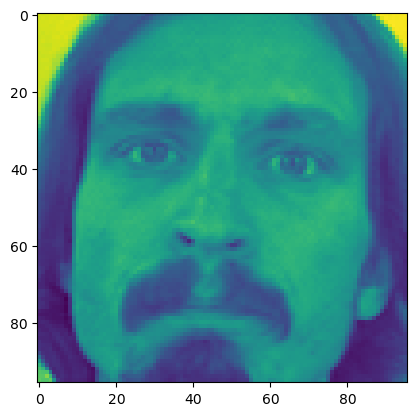

In [23]:
plt.imshow(X_train[0])
plt.show() #works

In [24]:
Y_train_raw = train_data.drop(columns='Image')
Y_train_raw


,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,67.402546,31.842551,29.746749,38.632942,59.255347,36.065143,73.942694,34.624653,37.478531,39.398041,...,48.265961,67.029093,72.600433,71.862041,34.232759,77.339429,51.599453,75.963592,50.426637,79.683921
7045,66.134400,38.365501,30.478626,39.950198,59.255347,36.065143,73.942694,34.624653,37.478531,39.398041,...,47.910346,66.626011,72.600433,71.862041,34.232759,77.339429,51.599453,75.963592,50.287397,77.983023
7046,66.690732,36.845221,31.666420,39.685042,59.255347,36.065143,73.942694,34.624653,37.478531,39.398041,...,49.462572,67.515161,72.600433,71.862041,34.232759,77.339429,51.599453,75.963592,49.462572,78.117120
7047,70.965082,39.853666,30.543285,40.772339,59.255347,36.065143,73.942694,34.624653,37.478531,39.398041,...,50.754202,66.724988,72.600433,71.862041,34.232759,77.339429,51.599453,75.963592,50.065186,79.586447


In [25]:
Y_train = []
for i in range(0,7049):
    Y = Y_train_raw.iloc[i,:] #get each column separately
    Y_train.append(Y)
    
Y_train = np.array(Y_train,dtype = 'float')

Y_train

array([[66.03356391, 39.00227368, 30.22700752, ..., 72.93545865,
        43.13070677, 84.48577444],
       [64.33293617, 34.9700766 , 29.9492766 , ..., 70.26655319,
        45.46791489, 85.48017021],
       [65.05705263, 34.90964211, 30.90378947, ..., 70.19178947,
        47.27494737, 78.65936842],
       ...,
       [66.69073171, 36.84522146, 31.66641951, ..., 75.96359236,
        49.46257171, 78.11712   ],
       [70.96508235, 39.85366588, 30.54328471, ..., 75.96359236,
        50.06518588, 79.58644706],
       [66.93831111, 43.42450963, 31.09605926, ..., 75.96359236,
        45.90048   , 82.7730963 ]])

## Get testing images from test data

In [26]:
test_images = test_data['Image']
# X_test = [] #to store the float image arrays
# #do the conversion as was done above

# for j in range(0, 1783):
#     image_arr_str = test_images[j].split()
#     image_arr_float = np.zeros(len(image_arr_str))
#     for i in range(len(image_arr_str)):
#         image_arr_float[i] = float(image_arr_str[i])
#     image_arr_float = np.reshape(image_arr_float, (96,96))
#     X_test.append(image_arr_float)

X_test = [] #to store the float image arrays
#do the conversion as was done above

for j in range(0, 1783):
    image_arr_str = test_images[j].split()
    image_arr_float = []
    for i in range(len(image_arr_str)):
        image_arr_float.append(float(image_arr_str[i]))
#     image_arr_float = np.reshape(image_arr_float, (96,96))
    X_test.append(image_arr_float)
    
X_test = np.array(X_test)
X_test = X_test.reshape(-1, 96, 96, 1)

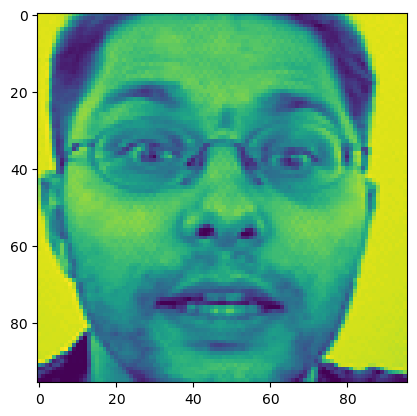

In [27]:
plt.imshow(X_test[0])
plt.show() #works

## Train model

In [54]:
model = models.Sequential()
#the images are 96*96 with 3 colour channels (RGB), passed as input_shape below:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 1)))
#above: 32 is num of filters, 3,3 is kernel dimensions
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (1, 1), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (1, 1), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (1, 1), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(256, (1, 1), activation='relu'))
model.add(layers.Conv2D(256, (1, 1), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(units=128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(30))

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 94, 94, 32)        320       
                                                                 
 max_pooling2d_48 (MaxPooli  (None, 47, 47, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_61 (Conv2D)          (None, 45, 45, 64)        18496     
                                                                 
 batch_normalization_30 (Ba  (None, 45, 45, 64)        256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_49 (MaxPooli  (None, 22, 22, 64)        0         
 ng2D)                                                           
                                                     

In [55]:
model.compile(optimizer='rmsprop',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [56]:
history = model.fit(x=X_train, y=Y_train, epochs=20, 
                    validation_split = 0.2, verbose=1)

Epoch 1/20
177/177 [==============================] - 33s 173ms/step - loss: 347.1177 - accuracy: 0.2901 - val_loss: 1838.9608 - val_accuracy: 0.6780
Epoch 2/20
177/177 [==============================] - 32s 180ms/step - loss: 102.3385 - accuracy: 0.3575 - val_loss: 659.2939 - val_accuracy: 0.5199
Epoch 3/20
177/177 [==============================] - 41s 232ms/step - loss: 79.3427 - accuracy: 0.3889 - val_loss: 195.4340 - val_accuracy: 0.6851
Epoch 4/20
177/177 [==============================] - 43s 242ms/step - loss: 69.2071 - accuracy: 0.4143 - val_loss: 299.8759 - val_accuracy: 0.6872
Epoch 5/20
177/177 [==============================] - 39s 222ms/step - loss: 62.4499 - accuracy: 0.4389 - val_loss: 93.6856 - val_accuracy: 0.6872
Epoch 6/20
177/177 [==============================] - 44s 248ms/step - loss: 58.5715 - accuracy: 0.4648 - val_loss: 32.8811 - val_accuracy: 0.6830
Epoch 7/20
177/177 [==============================] - 41s 233ms/step - loss: 53.5556 - accuracy: 0.4749 - val_l

In [57]:
loss_df = pd.DataFrame(model.history.history)

<Axes: >

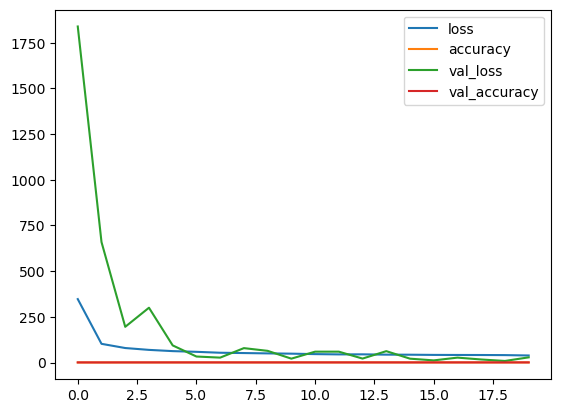

In [58]:
loss_df.plot()

## Prediction

In [59]:
predict = model.predict(X_test)

56/56 [==============================] - 3s 55ms/step


In [60]:
feature_names = list(idLUT['FeatureName'])
image_ids = list(idLUT['ImageId']-1)
row_ids = list(idLUT['RowId'])

feature_list = []
for feature in feature_names:
    feature_list.append(feature_names.index(feature))

In [61]:
idLUT

,RowId,ImageId,FeatureName,Location
0,1,1,left_eye_center_x,NaN
1,2,1,left_eye_center_y,NaN
2,3,1,right_eye_center_x,NaN
3,4,1,right_eye_center_y,NaN
4,5,1,left_eye_inner_corner_x,NaN
...,...,...,...,...
27119,27120,1783,right_eye_center_y,NaN
27120,27121,1783,nose_tip_x,NaN
27121,27122,1783,nose_tip_y,NaN
27122,27123,1783,mouth_center_bottom_lip_x,NaN


In [62]:
predictions = []
for x,y in zip(image_ids, feature_list):
    predictions.append(predict[x][y])

In [63]:
predictions

[76.78872,
 44.005238,
 34.82518,
 44.235317,
 69.29005,
 43.130535,
 85.87623,
 42.15038,
 43.14599,
 45.097958,
 26.22789,
 45.70253,
 63.91518,
 34.664806,
 93.39544,
 33.543797,
 45.552303,
 36.950054,
 18.347954,
 38.780468,
 55.16683,
 71.664986,
 78.73042,
 86.24291,
 39.530983,
 89.4361,
 58.122887,
 86.45187,
 55.570866,
 92.981514,
 76.57752,
 43.71458,
 34.594936,
 43.973743,
 69.11337,
 42.997036,
 85.718475,
 42.19068,
 42.815056,
 44.916435,
 26.192854,
 45.24088,
 63.699955,
 34.345264,
 93.01831,
 33.402653,
 45.31675,
 36.549797,
 18.353563,
 38.266624,
 54.76722,
 70.66771,
 77.66159,
 86.11536,
 39.28553,
 89.07112,
 57.579964,
 85.96929,
 55.183506,
 92.973885,
 77.06342,
 44.344017,
 35.112778,
 44.68493,
 69.322685,
 43.334694,
 86.42795,
 42.03829,
 43.653187,
 45.640415,
 26.209684,
 46.24823,
 63.853176,
 35.011093,
 93.83421,
 33.632534,
 45.807396,
 37.62936,
 18.254751,
 39.66357,
 55.654163,
 72.86256,
 80.21382,
 86.06756,
 39.751194,
 89.978226,
 58.73671

In [64]:
row_ids = pd.Series(row_ids, name = 'RowId')
locations = pd.Series(predictions, name = 'Location')
locations = locations.clip(0.0,96.0)
submission_result = pd.concat([row_ids,locations],axis = 1)
submission_result.to_csv('submission.csv',index = False)

In [65]:
submission_result

,RowId,Location
0,1,76.788719
1,2,44.005238
2,3,34.825180
3,4,44.235317
4,5,69.290047
...,...,...
27119,27120,43.711529
27120,27121,54.467243
27121,27122,70.241234
27122,27123,54.859352
